# This notebook is Part 1 of the Task 4.10

## Table of Contents

This notebook contains the following: 


* Imported libraries


* Imported dataset


* PII privacy checks


* Visualizations 


* Assign regions


* Creating customer profiles
  
  1. Age profile
  2. Income profile
  3. Number of dependents profile
  4. Departments profiles - Baby, Personal Care and Breakfast  


*  Aggregate max, mean, and min variables on a customer-profile level for usage frequency and expenditure

  1. Age aggregation
  2. Income aggregation
  3. Number of dependents aggregation
  4. Department based aggregation


* Visualizations 

  1. Age profile
  2. Income profile
  3. Number of dependents profile
  4. Department based profiles


## Step 1 

## Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

### 01. Importing libraries

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Turning project path into a string

In [2]:
#Turn project folder path into a string

'/Users/aysha/Documents/Instacart Basket Analysis/'

'/Users/aysha/Documents/Instacart Basket Analysis/'

In [3]:
path = r'/Users/aysha/Documents/Instacart Basket Analysis/'

In [4]:
path

'/Users/aysha/Documents/Instacart Basket Analysis/'

### 03. Importing data (the data set with new customer columns from Exercise 4.9) 

In [5]:
# Import the most up-to-date dataset as a dataframe  

df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_all_data.pkl'))

In [6]:
# Check dataframe

df_ords_prods_customers.shape

(32404859, 34)

## Step 2

## Consider any security implications that might exist for this new data. You’ll need to address any PII (personally identifiable information) data in the data before continuing your analysis.

In [8]:
# Check columns in the imported df for PII data 

df_ords_prods_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_time_customers',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'Frequency_of_customer',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', '_merge'],
      dtype='object')

**The columns 'first_name' and 'surname' are PII and should be removed**

In [9]:
# Removing columns with PII data along with _merge column

df_ords_prods_customers = df_ords_prods_customers.drop(columns = ['first_name','surname', '_merge'])

In [10]:
# Checking shape of df

df_ords_prods_customers.shape

(32404859, 31)

In [11]:
# Checking columns after removing PII data 

df_ords_prods_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_time_customers',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'Frequency_of_customer',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income'],
      dtype='object')

## Step 3

## The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

## * Use the region information in this Wikipedia article(https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States) to create your column (you only need to create regions, not divisions).
    
## * Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [12]:
# Defining regions (Northeast, Midwest, South and West) as per states 

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [15]:
# Create a new column 'Region' based on the state column from the customers data set 

# Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
# Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
# South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
# West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

result = []

for value in df_ords_prods_customers["state"]:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:result.append("Northeast")
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:result.append("Midwest")
  elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:result.append("South")  
  else:result.append("West")

In [16]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [17]:
# Checking if result length = DataFrame length

len(result)

32404859

In [18]:
# Combine the new column with df (Create a new columnn 'Region' and set it equal to 'result')

df_ords_prods_customers['region'] = result

In [19]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,Frequency_of_customer,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [20]:
#Checking frequency

df_ords_prods_customers['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [21]:
# Determining the difference in spending habits between the different U.S. regions
# (Hint: You can do this by crossing the variable you just created with the spending flag.)


crosstab = pd.crosstab(df_ords_prods_customers['region'], df_ords_prods_customers['spending_flag'], dropna = False)

In [22]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### Observations 

#### * The region 'South' has the highest numbers of both high and low spenders. A reason for this could be that more states fall in the region south, amounting to higher number of customers. 

#### * On the other hand, the northeast region has the lowest number of both high and low spenders. This could be due to the fact that the northeast region comprises of fewer states than the other regions in the US. 

## Step 4 

## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders)

df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] >= 5, 'activity'] = 'High'
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] < 5, 'activity'] = 'Low'

In [24]:
# Check head of df 
df_ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High


In [33]:
#Export this dataframework  
df_ords_prods_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_activity_flag_regions.pkl'))

In [25]:
# Get the amount customers for low / high activity for the column 'activity'  

df_ords_prods_customers['activity'].value_counts(dropna = False)

High    30964564
Low      1440295
Name: activity, dtype: int64

In [28]:
# Creating a new df(subset) for low activity customers 

df_activity_low = df_ords_prods_customers[df_ords_prods_customers['activity'] == 'Low']

In [30]:
#Check shape
df_activity_low.shape

(1440295, 33)

In [31]:
#Export this dataframework to exclude it from the data
df_activity_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers_4_10.pkl'))

In [32]:
# Creating a new df(subset) for high activity customers 

df_activity_high = df_ords_prods_customers[df_ords_prods_customers['activity'] == 'High']

In [34]:
#Check shape
df_activity_high.shape

(30964564, 33)

In [35]:
#Check df
df_activity_high

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High
32404851,2988973,106143,23,2,22,5.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High
32404852,930,106143,24,6,12,4.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High
32404853,467253,106143,25,6,16,7.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High


In [36]:
# Deleting df_activity_low to reduce memory usage

del df_activity_low

In [37]:
#Deleting original df (df_ords_prods_customers) to reduce memory usage

del df_ords_prods_customers

## Step 5 

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Before we proceed, we need to merge the departments dataset to the current df

In [38]:
# Check columns in df
df_activity_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_time_customers',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'Frequency_of_customer',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity'],
      dtype='object')

In [39]:
# Import df for departments 

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [41]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [42]:
#Rename column in df_dept
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [43]:
#Check head
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [44]:
#Check columns
df_activity_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_time_customers',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'Frequency_of_customer',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity'],
      dtype='object')

In [45]:
#Merging with dataframe (df_dept to df_activity_high) on department_id

df_full_data = df_activity_high.merge(df_dept, on = 'department_id')

In [46]:
#Check head of merged df
df_full_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High,beverages


### Creating profiles

### Age Profile

Age_profile has four age groups:
* Young Adults  (18 - 34)
* Middle-Aged Adults (35 - 54)
* Older Adults (55 - 64)
* Senior Citizens (65+)

In [50]:
#Create an age flag for four age groups 

df_full_data.loc[(df_full_data['age'] >= 18)  & (df_full_data['age'] < 35) , 'age_profile'] = 'Young Adults'
df_full_data.loc[(df_full_data['age'] >= 35) & (df_full_data['age'] < 55), 'age_profile'] = 'Middle-Aged Adults'
df_full_data.loc[(df_full_data['age'] >= 55) & (df_full_data['age'] < 65), 'age_profile'] = 'Older Adults '
df_full_data.loc[df_full_data['age'] >= 65, 'age_profile'] = 'Senior Citizens' 


In [54]:
df_full_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,marital_status,income,region,activity,department,age_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,High,beverages,Young Adults
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High,beverages,Young Adults
2,473747,1,3,3,12,21.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High,beverages,Young Adults
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High,beverages,Young Adults
4,431534,1,5,4,15,28.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High,beverages,Young Adults


In [56]:
# Print frequency 
df_full_data['age_profile'].value_counts()

Middle-Aged Adults    9724238
Young Adults          8242295
Senior Citizens       8195544
Older Adults          4802487
Name: age_profile, dtype: int64

### Income Profile

Income groups have been classified into three categories:
* Low Income (< 53000 USD)
* Average Income (> 53000 but < 106000 USD)
* Above Average Income ( > 106000 USD)

In [59]:
# Create an income flag for three income levels 

df_full_data.loc[df_full_data['income'] < 53000, 'income_group'] = 'Low Income'
df_full_data.loc[(df_full_data['income'] > 53000) & (df_full_data['income'] < 106000), 'income_group'] = 'Average Income'
df_full_data.loc[(df_full_data['income'] > 106000), 'income_group'] = 'Above Average Income'

In [60]:
# Check df now 
df_full_data['income_group'].value_counts(dropna=False)

Average Income          14507715
Above Average Income    12547621
Low Income               3909031
NaN                          197
Name: income_group, dtype: int64

### Number of dependents profile

The dependents_profile has been categorized in two groups: 
* Has dependents (1 or more)
* No dependents (0)

In [65]:
# Create a no. of dependents flag for two groups

df_full_data.loc[df_full_data['number_of_dependents'] > 0, 'dependents_profile'] = 'Has dependents'
df_full_data.loc[df_full_data['number_of_dependents'] == 0, 'dependents_profile'] = 'No dependents'

In [66]:
# Check df now 
df_full_data['dependents_profile'].value_counts(dropna=False)

Has dependents    23224883
No dependents      7739681
Name: dependents_profile, dtype: int64

In [68]:
# Check head
df_full_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependents,marital_status,income,region,activity,department,age_profile,income_group,dependents_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents
2,473747,1,3,3,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents
3,2254736,1,4,4,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents
4,431534,1,5,4,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents


### Certain goods in the department_id column profile

#### Following departments will be taken into account: 

#### * Babies 

#### * Personal care

#### * Breakfast

In [67]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [79]:
df_full_data['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Baby flag

In [82]:
#Creating baby flag: bought baby supplies(1)/didn't buy baby supplies (0). 

df_full_data['baby_flag']=[1 if x=='babies' else 0 for x in df_full_data['department']]
df_full_data['baby_flag']=df_full_data.groupby(['user_id'])['baby_flag'].transform(np.max)

In [85]:
#Check values
df_full_data['baby_flag'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_flag, dtype: int64

In [86]:
df_full_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_customers,product_id,add_to_cart_order,reordered,...,number_of_dependents,marital_status,income,region,activity,department,age_profile,income_group,dependents_profile,baby_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents,0
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents,0
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents,0
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents,0
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,High,beverages,Young Adults,Low Income,Has dependents,0


### Personal Care flag

In [87]:
#Creating personal care flag: bought personal care items(1)/didn't buy personal care items (0). 

df_full_data['personal_care_flag']=[1 if x=='personal care' else 0 for x in df_full_data['department']]
df_full_data['personal_care_flag']=df_full_data.groupby(['user_id'])['personal_care_flag'].transform(np.max)

In [88]:
#Check values
df_full_data['personal_care_flag'].value_counts(dropna=False)

1    20648262
0    10316302
Name: personal_care_flag, dtype: int64

### Breakfast flag

In [89]:
#Creating breakfast flag: bought breakfast items(1)/didn't buy breakfast items (0). 

df_full_data['breakfast_flag']=[1 if x=='breakfast' else 0 for x in df_full_data['department']]
df_full_data['breakfast_flag']=df_full_data.groupby(['user_id'])['breakfast_flag'].transform(np.max)

In [90]:
#Check values
df_full_data['breakfast_flag'].value_counts(dropna=False)

1    24336236
0     6628328
Name: breakfast_flag, dtype: int64

In [96]:
# Reduce data type for newly created columns from int64 to to int8 
# Reduce data type for other columns as well to reduce memory usage 

df_full_data['baby_flag'] = df_full_data['baby_flag'].astype('int8')
df_full_data['personal_care_flag'] = df_full_data['personal_care_flag'].astype('int8')
df_full_data['breakfast_flag'] = df_full_data['breakfast_flag'].astype('int8')
df_full_data['orders_day_of_week'] = df_full_data['orders_day_of_week'].astype('int8')
df_full_data['order_time_of_day'] = df_full_data['order_time_of_day'].astype('int8')
df_full_data['department_id'] = df_full_data['department_id'].astype('int8') 

In [91]:
df_full_data.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_time_customers',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'Frequency_of_customer',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity', 'department', 'age_profile', 'income_group',
       'dependents_profile', 'baby_flag', 'personal_care_flag',
       'breakfast_flag'],
      dtype='object')

In [99]:
#Changing data types to reduce memory usage
df_full_data['user_id'] = df_full_data['user_id'].astype('str')
df_full_data['order_number'] = df_full_data['order_number'].astype('int32')
df_full_data['product_id'] = df_full_data['product_id'].astype('int32')
df_full_data['reordered'] = df_full_data['reordered'].astype('int8')
df_full_data['aisle_id'] = df_full_data['aisle_id'].astype('int8')

In [100]:
# Checking data usage of dataframe

df_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 40 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int32  
 3   orders_day_of_week      int8   
 4   order_time_of_day       int8   
 5   days_since_prior_order  float64
 6   first_time_customers    bool   
 7   product_id              int32  
 8   add_to_cart_order       int64  
 9   reordered               int8   
 10  product_name            object 
 11  aisle_id                int8   
 12  department_id           int8   
 13  prices                  float64
 14  price_range_loc         object 
 15  busiest day             object 
 16  Busiest days            object 
 17  Busiest_period_of_day   object 
 18  max_order               int64  
 19  loyalty_flag            object 
 20  average_price           float64
 21  spending_flag           objec

## Step 6 

## Create an appropriate visualization to show the distribution of profiles.

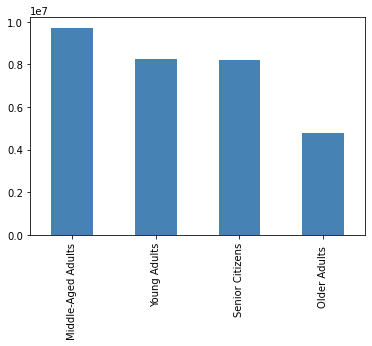

In [102]:
# Create bar chart for age profile of customers

bar_chart = df_full_data['age_profile'].value_counts().plot.bar(color = ['steelblue'])

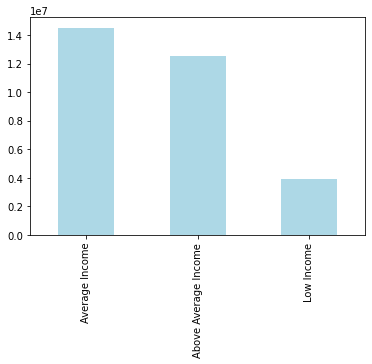

In [103]:
# Bar chart for income groups 

income_groups_bar = df_full_data['income_group'].value_counts().plot.bar(color = ['lightblue'])

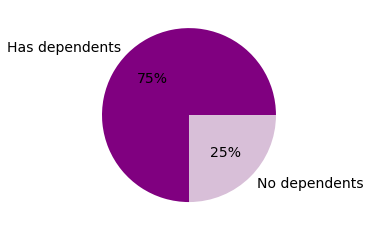

In [105]:
# Pie chart for dependents_profile

dependents_pie_chart = df_full_data['dependents_profile'].value_counts().plot.pie(label='', labels=['Has dependents', 'No dependents'], autopct=('%1.f%%'), colors=['purple','thistle'], textprops={'fontsize': 14})



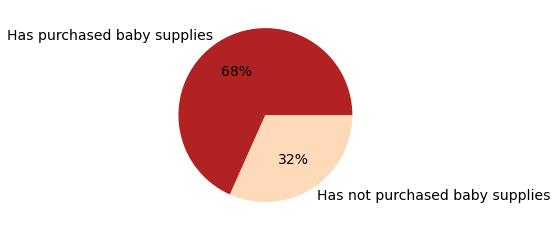

In [108]:
# Pie chart for customers who bought a baby item atleast one time (baby_flag)

baby_pie_chart = df_full_data['baby_flag'].value_counts().plot.pie(label='', labels=['Has purchased baby supplies', 'Has not purchased baby supplies'], autopct=('%1.f%%'), colors=['firebrick','peachpuff'], textprops={'fontsize': 14})



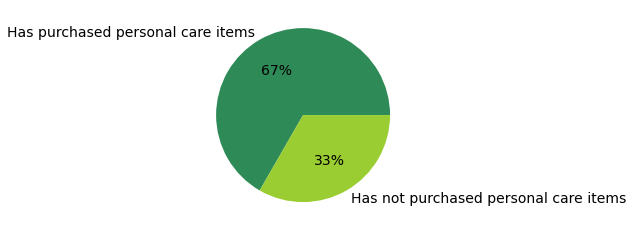

In [107]:
# Pie chart for customers who bought a personal care item atleast one time (personal_care_flag)

personal_care_pie_chart = df_full_data['personal_care_flag'].value_counts().plot.pie(label='', labels=['Has purchased personal care items', 'Has not purchased personal care items'], autopct=('%1.f%%'), colors=['seagreen','yellowgreen'], textprops={'fontsize': 14})



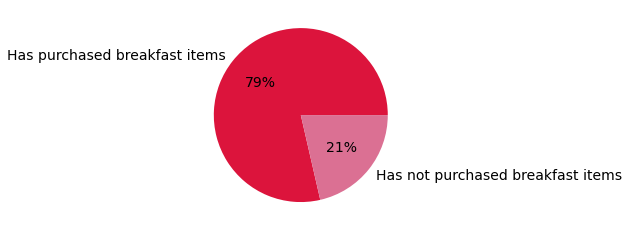

In [109]:
# Pie chart for customers who bought breakfast items atleast one time (breakfast_flag)


breakfast_pie_chart = df_full_data['breakfast_flag'].value_counts().plot.pie(label='', labels=['Has purchased breakfast items', 'Has not purchased breakfast items'], autopct=('%1.f%%'), colors=['crimson','palevioletred'], textprops={'fontsize': 14})




### Export visualizations

In [110]:
# Export bar chart for age profile of customers

bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_age_profile_bar.png'))

In [111]:
# Export bar chart for income groups 

income_groups_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_income_groups_bar.png'))

In [112]:
# Export pie chart for dependents_profile

dependents_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_dependents_pie_chart.png'))

In [113]:
# Export pie chart for baby_flag

baby_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_baby_pie_chart.png'))

In [114]:
# Export pie chart for personal_care_flag

personal_care_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_personal_care_pie_chart.png'))

In [115]:
# Export pie chart for breakfast_flag

breakfast_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_breakfast_pie_chart.png'))

## Step 7

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Usage frequency = Frequency_of_customer

Expenditure = Prices

In [116]:
# Age_profile flag and usage frequency 

df_full_data.groupby('age_profile').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                                    mean  min   max
age_profile                                        
Middle-Aged Adults              9.950691  0.0  30.0
Older Adults                   10.007535  0.0  30.0
Senior Citizens                 9.933025  0.0  30.0
Young Adults                    9.959362  0.0  30.0

In [117]:
# Age_profile flag and expenditure

df_full_data.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                         mean  min      max
age_profile                                
Middle-Aged Adults  11.738511  1.0  99999.0
Older Adults        12.284287  1.0  99999.0
Senior Citizens     11.757768  1.0  99999.0
Young Adults        12.133971  1.0  99999.0

In [121]:
# Fix prices by marking them as NaN
df_full_data.loc[df_full_data['prices'] >100, 'prices'] = np.nan

In [122]:
# Running aggregate function for age_profile flag and expenditure again

df_full_data.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
age_profile                            
Middle-Aged Adults  7.790195  1.0  25.0
Older Adults        7.790571  1.0  25.0
Senior Citizens     7.796715  1.0  25.0
Young Adults        7.784978  1.0  25.0

In [119]:
# Income_group flag and usage frequency 

df_full_data.groupby('income_group').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                                      mean  min   max
income_group                                         
Above Average Income              9.869232  0.0  30.0
Average Income                    9.895782  0.0  30.0
Low Income                       10.466495  0.0  30.0

In [123]:
# Income_group flag and expenditure

df_full_data.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
income_group                             
Above Average Income  7.952584  1.0  25.0
Average Income        7.914232  1.0  25.0
Low Income            6.811935  1.0  25.0

In [124]:
# Dependents_profile flag and usage frequency 

df_full_data.groupby('dependents_profile').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                                    mean  min   max
dependents_profile                                 
Has dependents                  9.963995  0.0  30.0
No dependents                   9.936569  0.0  30.0

In [125]:
# Dependents_profile flag and expenditure

df_full_data.groupby('dependents_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
dependents_profile                     
Has dependents      7.790937  1.0  25.0
No dependents       7.789550  1.0  25.0

In [127]:
# Baby_flag and usage frequency 

df_full_data.groupby('baby_flag').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                           mean  min   max
baby_flag                                 
0                     10.731215  0.0  30.0
1                      8.287965  0.0  30.0

In [126]:
# Baby_flag and expenditure

df_full_data.groupby('baby_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
baby_flag                     
0          7.770758  1.0  25.0
1          7.833353  1.0  25.0

In [128]:
# Personal_care_flag and usage frequency 

df_full_data.groupby('personal_care_flag').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                                    mean  min   max
personal_care_flag                                 
0                              11.594146  0.0  30.0
1                               9.139258  0.0  30.0

In [129]:
# Personal_care_flag and expenditure

df_full_data.groupby('personal_care_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
personal_care_flag                     
0                   7.799523  1.0  25.0
1                   7.786127  1.0  25.0

In [130]:
# Breakfast_flag and usage frequency 

df_full_data.groupby('breakfast_flag').agg({'Frequency_of_customer': ['mean', 'min', 'max']})

Frequency_of_customer           
                                mean  min   max
breakfast_flag                                 
0                          12.107714  0.0  30.0
1                           9.371400  0.0  30.0

In [131]:
# Breakfast_flag and expenditure

df_full_data.groupby('breakfast_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
breakfast_flag                     
0               7.814123  1.0  25.0
1               7.784181  1.0  25.0

In [145]:
df_full_data.shape

(30964564, 40)

In [146]:
# Export dataset 

df_full_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_full_dataset_final.pkl'))

## Step 8 

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Create a link with the crosstab function between regions and different profiles created above

In [132]:
# Create a crosstab between region and age_profile

age_profile_crosstab = pd.crosstab(df_full_data['region'], df_full_data['age_profile'], dropna = False)

In [133]:
age_profile_crosstab

age_profile,Middle-Aged Adults,Older Adults,Senior Citizens,Young Adults
region,,,,
Midwest,2317269,1128325,1904046,1911873
Northeast,1686498,825305,1484807,1468075
South,3227128,1607092,2708461,2768458
West,2493343,1241765,2098230,2093889


In [134]:
# Create a crosstab for region and income_group

income_group_crosstab = pd.crosstab(df_full_data['region'], df_full_data['income_group'], dropna = False)

In [135]:
income_group_crosstab

income_group,Above Average Income,Average Income,Low Income
region,,,
Midwest,2986624,3363368,911491
Northeast,2231222,2540596,692867
South,4137019,4848740,1325213
West,3192756,3755011,979460


In [136]:
# Create a crosstab for region and dependents_profile

dependents_profile_crosstab = pd.crosstab(df_full_data['region'], df_full_data['dependents_profile'], dropna = False)

In [137]:
dependents_profile_crosstab

dependents_profile,Has dependents,No dependents
region,,
Midwest,5438697,1822816
Northeast,4110203,1354482
South,7729206,2581933
West,5946777,1980450


In [138]:
# Create a crosstab for region and baby_flag

baby_flag_crosstab = pd.crosstab(df_full_data['region'], df_full_data['baby_flag'], dropna = False)

In [139]:
baby_flag_crosstab

baby_flag,0,1
region,,
Midwest,4958232,2303281
Northeast,3715606,1749079
South,7040685,3270454
West,5439788,2487439


In [141]:
# Create a crosstab for region and personal_care_flag

personal_care_flag_crosstab = pd.crosstab(df_full_data['region'], df_full_data['personal_care_flag'], dropna = False)

In [142]:
personal_care_flag_crosstab

personal_care_flag,0,1
region,,
Midwest,2422984,4838529
Northeast,1823279,3641406
South,3413825,6897314
West,2656214,5271013


In [143]:
# Create a crosstab for region and breakfast_flag

breakfast_flag_crosstab = pd.crosstab(df_full_data['region'], df_full_data['breakfast_flag'], dropna = False)

In [144]:
breakfast_flag_crosstab

breakfast_flag,0,1
region,,
Midwest,1576804,5684709
Northeast,1182096,4282589
South,2210370,8100769
West,1659058,6268169


## Step 9

## Produce suitable charts to illustrate your results and export them in your project folder.

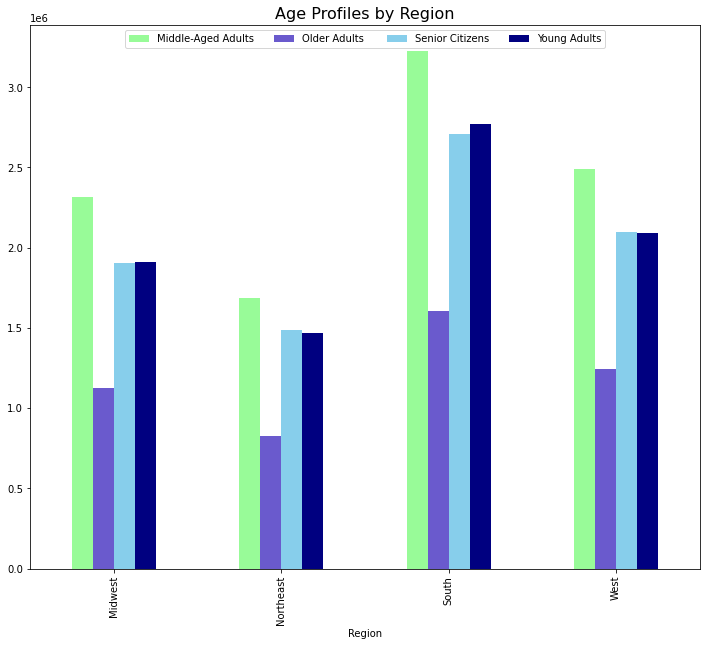

In [152]:
# Create a bar chart for age_profile and region

age_profile_crosstab_bar = age_profile_crosstab.plot(kind ='bar', stacked = False, color = ['palegreen','slateblue','skyblue','navy'], figsize=(12, 10))
plt.title('Age Profiles by Region', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [162]:
# Export bar chart

age_profile_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_age_profile_regions_bar_chart.png'))

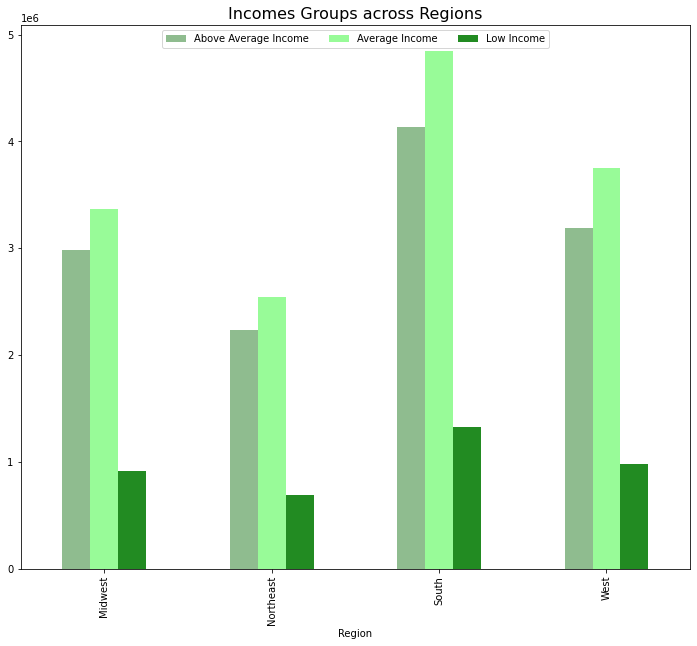

In [153]:
# Create a bar chart for income_group and region

income_group_crosstab_bar = income_group_crosstab.plot(kind ='bar', stacked = False, color = ['darkseagreen','palegreen','forestgreen'], figsize=(12, 10))
plt.title('Incomes Groups across Regions', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [159]:
# Export bar chart

income_group_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_income_group_regions_bar_chart.png'))

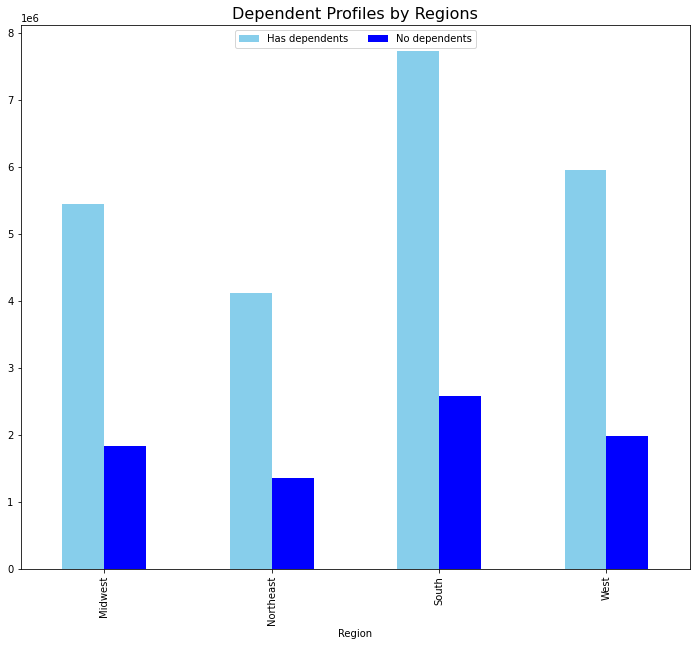

In [160]:
# Create a bar chart for dependents_profile and region

dependents_profile_crosstab_bar = dependents_profile_crosstab.plot(kind ='bar', stacked = False, color = ['skyblue','blue'], figsize=(12, 10))
plt.title('Dependent Profiles by Regions', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [161]:
# Export bar chart

dependents_profile_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_dependents_profile_regions_bar_chart.png'))

In [155]:
#Get full data for product ranges

df_full_data['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

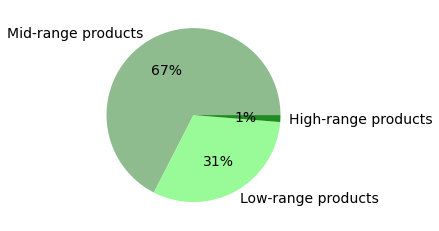

In [156]:
#Create pie chart

product_groups_pie_chart = df_full_data['price_range_loc'].value_counts().plot.pie(label='', labels=['Mid-range products', 'Low-range products', 'High-range products'], autopct=('%1.f%%'), colors=['darkseagreen','palegreen','forestgreen'], textprops={'fontsize': 14})


In [157]:
#Export pie chart

product_groups_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_product_groups_pie_chart.png'))

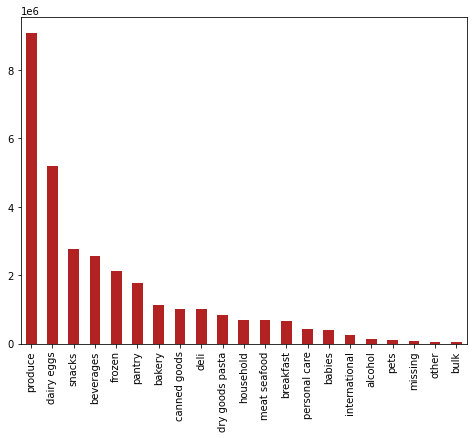

In [168]:
# Create a bar chart for departments

department_bar = df_full_data['department'].value_counts().plot.bar(color=['firebrick'], figsize=(8,6))

In [169]:
#Export bar chart 

department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_department_bar_chart.png'))

In [170]:
# Get the amount of loyal customers

df_full_data['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

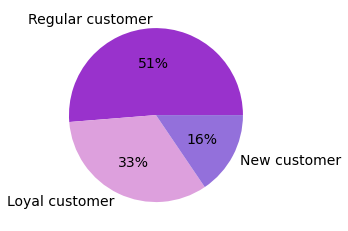

In [171]:
#Create pie chart

loyalty_flag_pie_chart = df_full_data['loyalty_flag'].value_counts().plot.pie(label='', labels=['Regular customer', 'Loyal customer', 'New customer'], autopct=('%1.f%%'), colors=['darkorchid','plum','mediumpurple'], textprops={'fontsize': 14})


In [172]:
#Export pie chart 

loyalty_flag_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_10_loyalty_flag_pie_chart.png'))

In [173]:
# Loyalty_flag and expenditure

df_full_data.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801665  1.0  25.0
Regular customer  7.798262  1.0  25.0